    Dataset  Paper  Reader  Rating
0  TestData      2       4       6
PAPER SCORE:        [0.80 0.50]
PAPER STEADINESS:   [1.00 0.55]
READER SCORE:       [1.00 0.23 0.50 1.00]
READER STEADINESS:  [1.00 1.00 1.55 1.55]
CHART: PAPER / PAPER SCORE
CHART: PAPER / PAPER STEADINESS
CHART: READER / READER SCORE
CHART: READER / READER STEADINESS


C:\Ambienti\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


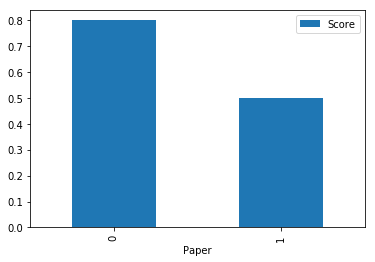

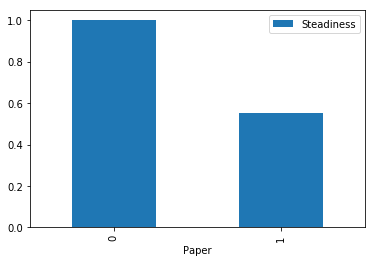

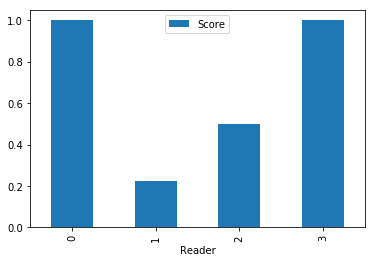

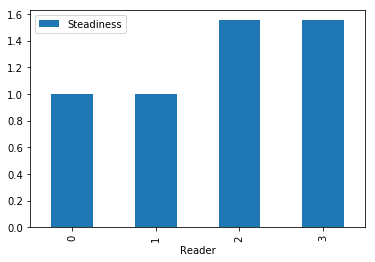

In [6]:
import pandas as pd
import seaborn as sb
import numpy as np
import math as m
from matplotlib import pyplot as plt
%matplotlib qt 
%matplotlib inline 

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

# Reader score must be set to a very small value otherwise there will be a division by 0

epsilon = 0.000001

# CSV file parsing

info = pd.read_csv("../data/info.csv")
paper_ratings = pd.read_csv("../data/ratings.csv")
paper_ratings = paper_ratings.as_matrix()

print(info)

# Initial setup

dataset_name, papers_number, readers_number, ratings_number = \
    info["Dataset"][0], info["Paper"][0], info["Reader"][0], info["Rating"][0]

papers = np.arange(papers_number)
readers = np.arange(readers_number)
ratings = np.arange(ratings_number)
paper_steadiness = np.zeros(papers_number)
paper_score = np.zeros(papers_number)
rating_goodness = np.empty(ratings_number)
reader_steadiness = np.zeros(readers_number)
reader_score = np.zeros(readers_number)
reader_score.fill(epsilon)

for index, entry in enumerate(paper_ratings):
               
        # Example: <1,1,2,0.8>
        # At Timestamp 1 Reader 1 gave to Paper 2 a Rating of 0.8
        timestamp = int(entry[0])
        reader = int(entry[1])
        paper = int(entry[2])
        rating = entry[3]
        
        # Saving values at time t(i)
        
        old_paper_steadiness = paper_steadiness[paper]
        old_paper_score = paper_score[paper]
        old_reader_steadiness = reader_steadiness[reader]
        old_rating_goodness = rating_goodness[timestamp]
        old_reader_score = reader_score[reader]                
        
        # Updating values at time t(i+1)
                          
        paper_steadiness[paper] = old_paper_steadiness + reader_score[reader]
        paper_score[paper] = ((old_paper_steadiness * old_paper_score) + (old_reader_score * rating))/ paper_steadiness[paper] 
        reader_steadiness[reader] = (old_reader_steadiness + paper_steadiness[paper])
        rating_goodness[timestamp] = 1 - (m.sqrt(abs(rating-paper_score[paper])))
        reader_score[reader] = ((old_reader_steadiness * old_reader_score) + (paper_steadiness[paper]*rating_goodness[timestamp]))/reader_steadiness[reader]
        
        if index > 0 :
            
            previous_paper_ratings = paper_ratings[:(index-1)]
            
            for previous_index, previous_entry in enumerate(previous_paper_ratings):
            
                previous_timestamp = int(previous_entry[0])
                previous_reader = int(previous_entry[1])
                previous_paper = int(previous_entry[2])
                previous_rating = previous_entry[3]
                
                if paper == previous_paper and reader != previous_reader:
                
                    # Saving previous values at time t(i)
            
                    old_previous_reader_steadiness = reader_steadiness[previous_reader]
                    old_previous_reader_score = reader_score[previous_reader]
                    old_previous_rating = previous_rating
                    old_previous_rating_goodness = rating_goodness[previous_timestamp]
                    
                    # Updating previous values at time t(i+1)
                    
                    previous_rating_goodness = 1 - (m.sqrt(abs(previous_rating-paper_score[paper])))
                    reader_steadiness[previous_reader] = (old_previous_reader_steadiness + old_reader_score)
                    reader_score[previous_reader] = ((old_previous_reader_steadiness * old_previous_reader_score) + (old_paper_steadiness * old_rating_goodness) + (paper_steadiness[paper] * previous_rating_goodness)) / reader_steadiness[previous_reader]

# Summary
                
print("PAPER SCORE:       ", paper_score)
print("PAPER STEADINESS:  ", paper_steadiness)
print("READER SCORE:      ", reader_score)
print("READER STEADINESS: ", reader_steadiness)

# Charts

print("CHART: PAPER / PAPER SCORE")
dataframe = pd.DataFrame({'Paper':papers, 'Score':paper_score})
dataframe.plot('Paper', 'Score', kind='bar')

print("CHART: PAPER / PAPER STEADINESS")
dataframe = pd.DataFrame({'Paper':papers, 'Steadiness':paper_steadiness})
dataframe.plot('Paper', 'Steadiness', kind='bar')

print("CHART: READER / READER SCORE")
dataframe = pd.DataFrame({'Reader':readers, 'Score':reader_score})
dataframe.plot('Reader', 'Score', kind='bar')

print("CHART: READER / READER STEADINESS")
dataframe = pd.DataFrame({'Reader':readers, 'Steadiness':reader_steadiness})
dataframe.plot('Reader', 'Steadiness', kind='bar')